In [2]:
# !pip install missingno
# !pip install geopy

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df_EDA = pd.read_pickle('/content/drive/My Drive/Airbnb/df_EDA.pkl')

In [6]:
df = df_EDA.copy()

In [7]:
# df = df.drop(columns=['Listing ID','Host ID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23536 entries, 0 to 23535
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Listing ID             23536 non-null  int64         
 1   Accomodates            23536 non-null  float64       
 2   Accuracy Rating        18888 non-null  float64       
 3   Bathrooms              23507 non-null  float64       
 4   Bedrooms               23516 non-null  float64       
 5   Beds                   23501 non-null  float64       
 6   Checkin Rating         18870 non-null  float64       
 7   Cleanliness Rating     18892 non-null  float64       
 8   Communication Rating   18886 non-null  float64       
 9   Guests Included        23536 non-null  float64       
 10  Host ID                23536 non-null  float64       
 11  Latitude               23536 non-null  float64       
 12  Location Rating        18871 non-null  float64       
 13  L

## Defines data columns Lists

In [77]:
numerical_columns = ['Accomodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Guests Included','Min Nights','Reviews','Price']
rating_columns = ['Value Rating','Location Rating', 'Cleanliness Rating','Checkin Rating','Accuracy Rating','Communication Rating','Host Response Rate','Overall Rating']
boolean_columns = ['Is Superhost','Is Exact Location', 'Instant Bookable']
categorical_columns = ['Room Type','Property Type Reduced','Neighborhood Group', 'Neighbourhood Grouped','Postal Code Reduced','Host Response Time']
date_columns = ['review_date','Host Since']
non_categorical_columns = numerical_columns + rating_columns + boolean_columns

In [9]:
df[categorical_columns].describe()

,Room Type,Property Type Reduced,Neighborhood Group,Neighbourhood Grouped,Postal Code Reduced,Host Response Time
count,23536,23536,23536,23536,22951,13046
unique,3,15,12,12,7,4
top,Private room,Apartment,Friedrichshain-Kreuzberg,Friedrichshain-Kreuzberg,10,within an hour
freq,11694,20935,5726,5718,14667,6816


# EDA - Explenatory Data Analysis

## Data Protocol

In [10]:
#Type of data
df.dtypes.to_excel ("df_datatype.xlsx", sheet_name='data_types')

#Maximum points
df[non_categorical_columns].max().to_excel("df_max.xlsx", sheet_name='max')

#Minimum points
df[non_categorical_columns].max().to_excel("df_max.xlsx", sheet_name='min')

#Isnull values
df.isnull().to_excel("df_isnull.xlsx", sheet_name='isnull')

#unique values
df.nunique().to_excel("df_nunique.xlsx", sheet_name='nunique')

# Categorical values
df[categorical_columns].describe().to_excel("df_categorical.xlsx", sheet_name='categorical')

## Descriptive statistics
   

In [11]:
df.shape

(23536, 37)

In [12]:
df[numerical_columns].describe()

,Accomodates,Bathrooms,Bedrooms,Beds,Guests Included,Min Nights,Price
count,23536.000000,23507.000000,23516.000000,23501.000000,23536.000000,23536.000000,23536.000000
mean,2.671737,1.095971,1.161720,1.641802,1.346151,6.897774,69.612424
std,1.567812,0.346150,0.660736,1.228642,0.856297,24.879032,216.660408
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,32.000000
50%,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,49.000000
75%,3.000000,1.000000,1.000000,2.000000,1.000000,4.000000,75.000000
max,16.000000,8.500000,10.000000,22.000000,16.000000,1000.000000,9000.000000


In [13]:
df[rating_cols].describe()

,Value Rating,Location Rating,Cleanliness Rating,Checkin Rating,Accuracy Rating,Communication Rating,Overall Rating,Host Response Rate,Reviews
count,18868.000000,18871.000000,18892.000000,18870.000000,18888.000000,18886.000000,18914.000000,13046.000000,23536.000000
mean,9.417638,9.550315,9.334904,9.728829,9.679850,9.746479,94.564344,91.842174,19.238826
std,0.840456,0.748713,1.031248,0.695275,0.737798,0.679600,7.599949,19.447852,40.360483
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,20.000000,0.000000,0.000000
25%,9.000000,9.000000,9.000000,10.000000,10.000000,10.000000,92.000000,95.000000,1.000000
50%,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,97.000000,100.000000,5.000000
75%,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,100.000000,100.000000,17.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,100.000000,100.000000,545.000000


In [14]:
df[['Host Since Year', 'Host Since Month', 'Host Since Day']].describe()

,Host Since Year,Host Since Month,Host Since Day
count,23515,23515,23515
unique,12,12,31
top,2015,8,5
freq,4591,2575,878


Several rows with unusually high values can be identified and may in some cases be dropped at a certain threshold

The description of price shows that 75% of the room only charged within 70€. But we can find the maximized price is extremely large - up to 9000€.

To exclude the outlier in this dataset, we set the data limit of 600€.

It also shows that data has 0 price, that is not make sense. So we will exclude it too.

In [15]:
df[['Beds','Min Nights','Reviews','Price']].describe().loc[['max']].T

,max
Beds,22.0
Min Nights,1000.0
Reviews,545.0
Price,9000.0


## Target Value

In [54]:
df[['Price']].describe()

,Price
count,23460.000000
mean,60.926726
std,49.445524
min,1.000000
25%,31.000000
50%,49.000000
75%,74.000000
max,600.000000


The description of price shows that 75% of the room only charged within 70€. But we can find the maximized price is extremely large - up to 9000€.

### Distribution of Price

In [ ]:
def target_value_distributions(df):
  plt.figure(figsize=(10, 6))
  sns.histplot(df['Price'], bins=200, kde=True)
  plt.title("Distribution of Price")
  plt.xlabel("Price")
  plt.ylabel("Frequency")
  plt.show()

In [ ]:
# Distribution of Price before dropping extream outlier values
target_value_distributions(df)

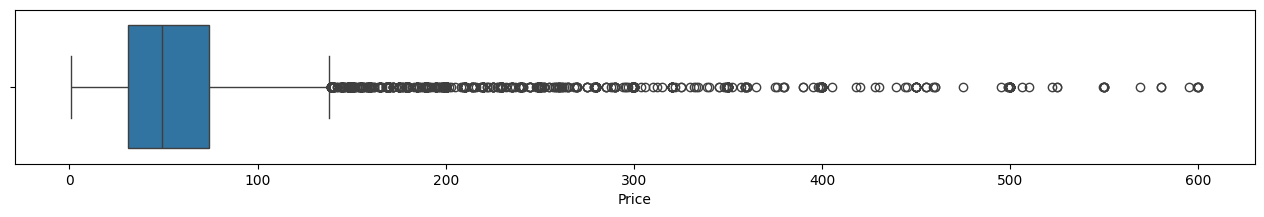

In [57]:
plt.figure(figsize=(16, 2))
sns.boxplot(df['Price'], orient='h')
plt.show()

To exclude the outlier in this dataset, we set the data limit of 600€.

In [ ]:
df = df[(df['Price'] <= 600) & (df['Price'] > 0)]
df['Price'].describe()

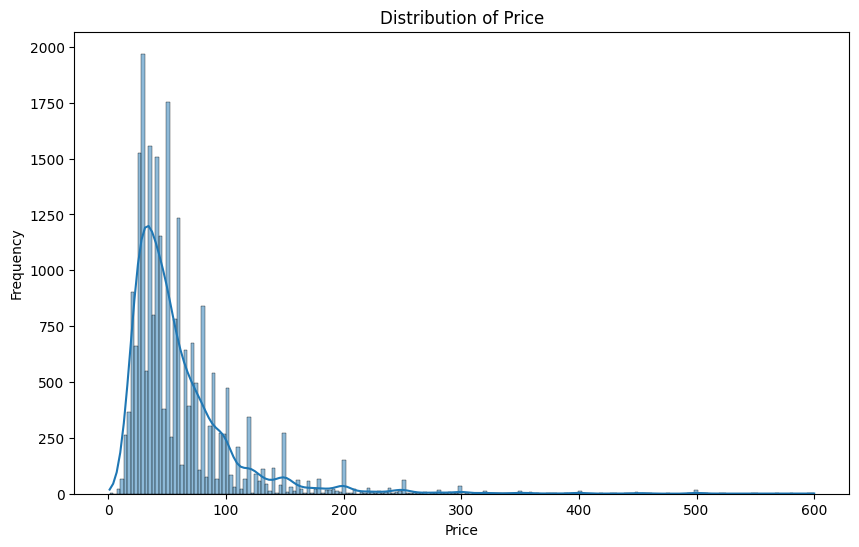

In [58]:
# Distribution of Price
target_value_distributions(df)

### Location vs Price

In [ ]:
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.7, figsize=(8,5),
        c="Price", cmap="gist_heat_r", colorbar=True, sharex=False);

## Missing values

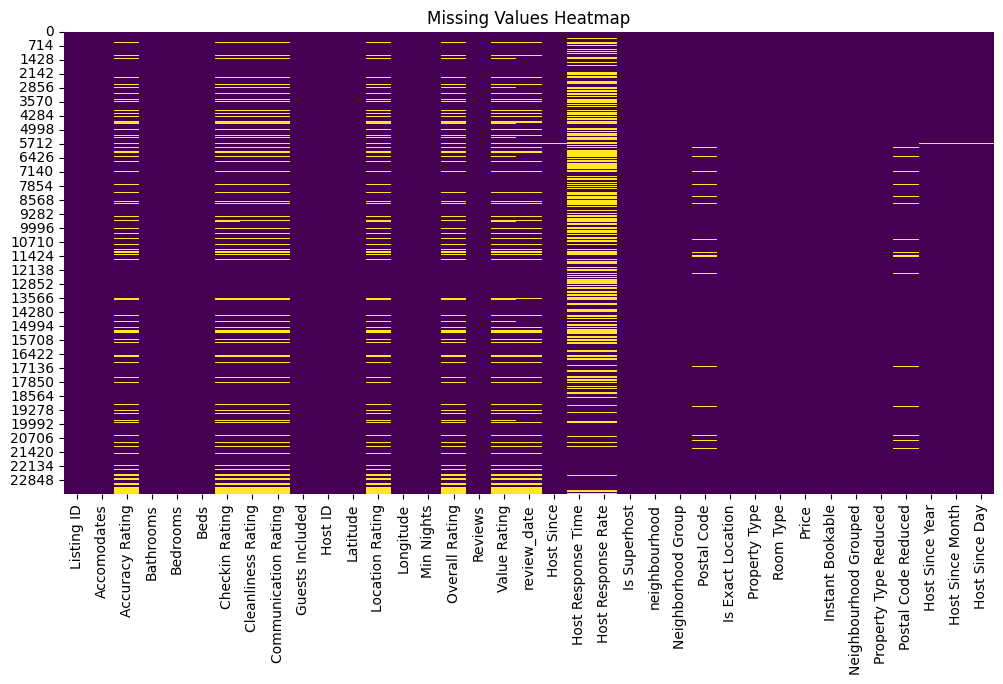

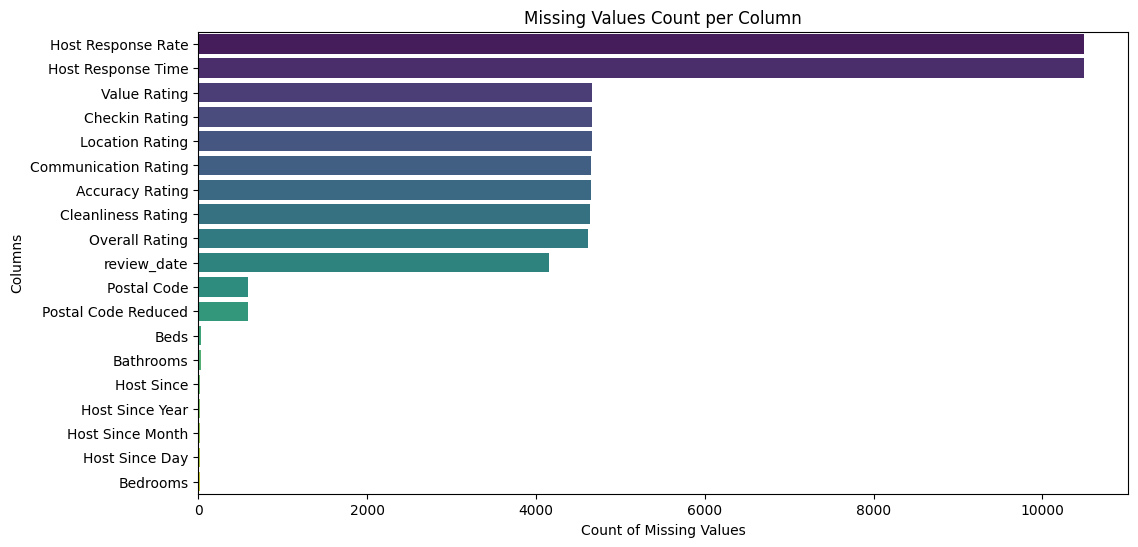


Missing Values:
Host Response Rate      10490
Host Response Time      10490
Value Rating             4668
Checkin Rating           4666
Location Rating          4665
Communication Rating     4650
Accuracy Rating          4648
Cleanliness Rating       4644
Overall Rating           4622
review_date              4156
Postal Code               585
Postal Code Reduced       585
Beds                       35
Bathrooms                  29
Host Since                 21
Host Since Year            21
Host Since Month           21
Host Since Day             21
Bedrooms                   20
dtype: int64


In [18]:
# Check for missing values
missing_values = df.isnull().sum()

# Visualizing missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Display missing values as a bar chart
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.values, y=missing_values.index, palette="viridis")
plt.xlabel("Count of Missing Values")
plt.ylabel("Columns")
plt.title("Missing Values Count per Column")
plt.show()


print("\nMissing Values:")
print(missing_values)

## Dummies

In [19]:
def plot_counts_for_columns(df, columns_names, rows=1, cols=3, figsize_=(20, 6)):
  i = 1
  plt.figure(figsize=figsize_)
  plt.subplots_adjust(hspace = 0.5)
  for col in columns_names:
    plt.subplot(rows, cols, i)
    plt.title(f"'{col}'")
    plt.xlabel(col)
    plt.ylabel("Count")
    sns.countplot(data=df, x=col)
    i = i + 1

  plt.tight_layout()
  plt.show()
  print (i)

In [20]:
boolean_cols

['Is Superhost', 'Is Exact Location', 'Instant Bookable']

In [21]:
df['Is Superhost'] = df['Is Superhost'].astype(bool)
df[boolean_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23536 entries, 0 to 23535
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Is Superhost       23536 non-null  bool 
 1   Is Exact Location  23536 non-null  bool 
 2   Instant Bookable   23536 non-null  bool 
dtypes: bool(3)
memory usage: 69.1 KB


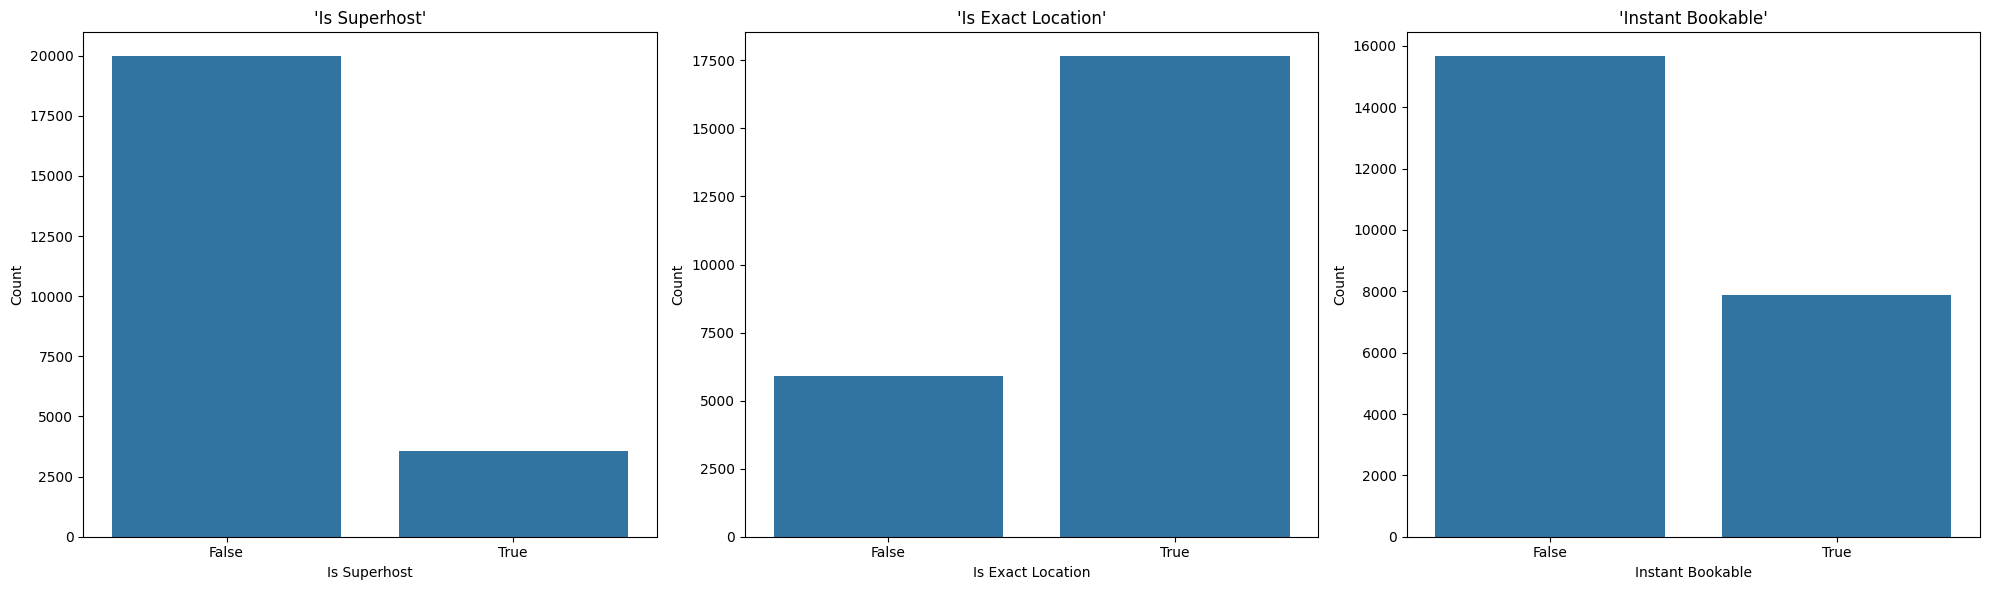

4


In [22]:
plot_counts_for_columns(df, boolean_cols)

## Categorial

In [23]:
df['Postal Code Reduced'].isna().sum()
# df['Postal Code Reduced'] = df['Postal Code Reduced'].astype(str)

585

In [24]:
categorical_columns

['Room Type',
 'Property Type Reduced',
 'Neighborhood Group',
 'Neighbourhood Grouped',
 'Postal Code Reduced',
 'Host Response Time']

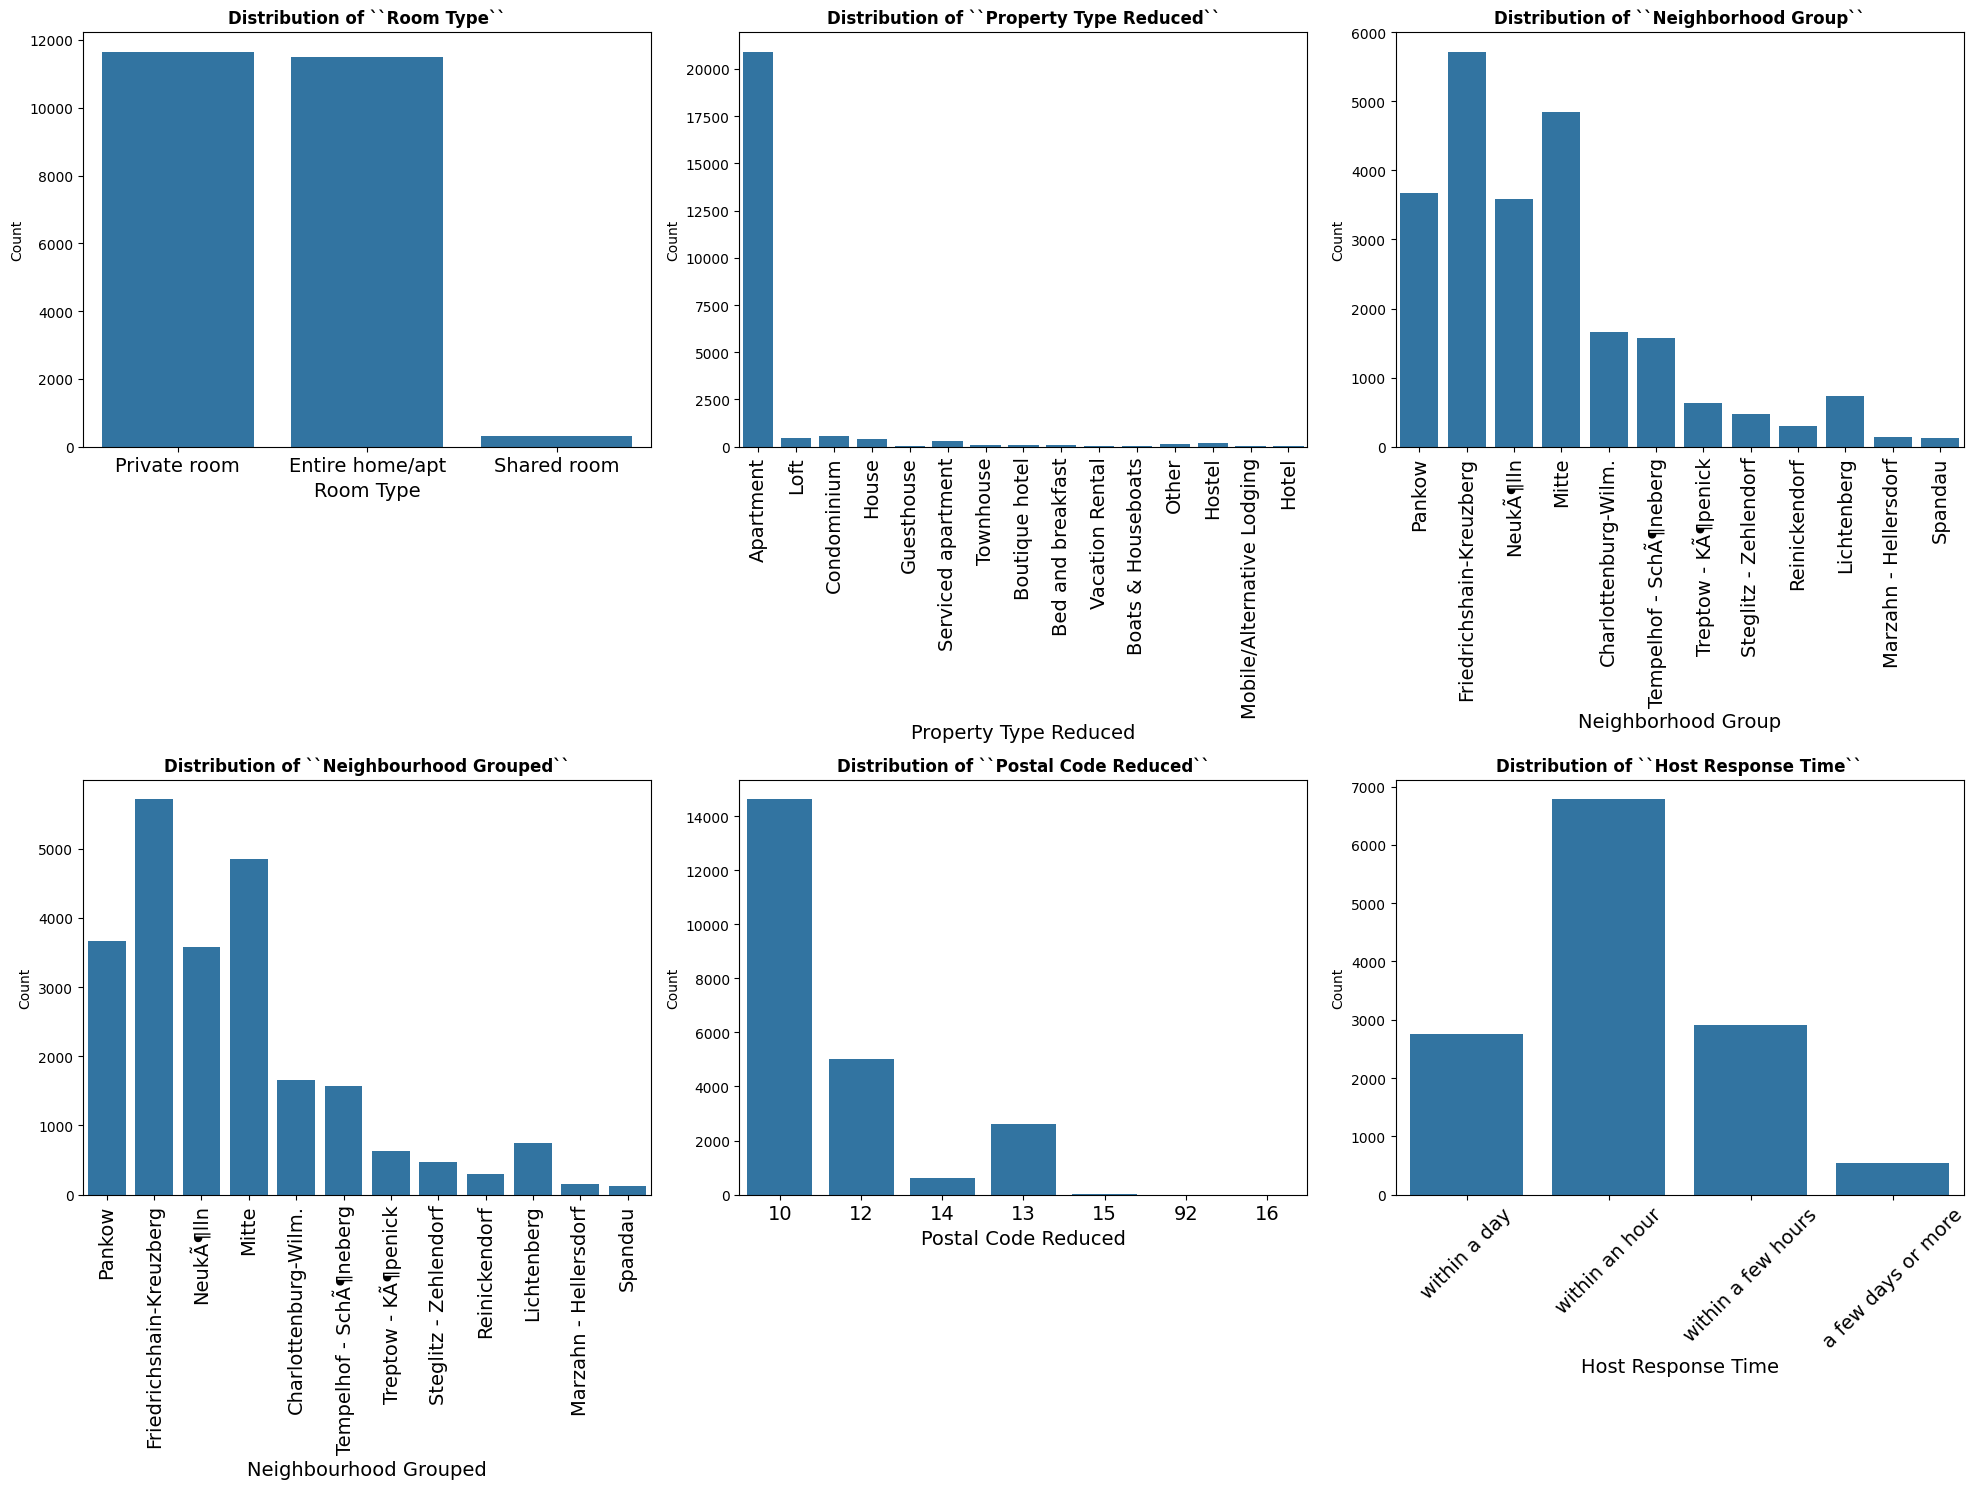

In [44]:
xticks_map = {'Room Type':0, 'Property Type Reduced':90, 'Neighborhood Group':90, 'Neighbourhood Grouped':90, 'Postal Code Reduced':0, 'Host Response Time':45}
i = 1
plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace = 0.5)
for col in categorical_columns:
  plt.subplot(2, 3, i)
  plt.title(f"Distribution of `{col}`", fontsize=12, fontweight="bold")
  plt.xlabel(col, fontsize=14)
  plt.xticks(rotation=xticks_map.get(col, 0), fontsize=14)
  plt.ylabel("Count")
  sns.countplot(data=df, x=col)
  i = i + 1

plt.tight_layout()
plt.show()

In [26]:
# df = df_EDA.copy()

In [27]:
# df['Host Since Year'] = df['Host Since Year'].astype('str').apply(lambda x: (x.split('.')[0]))
# df['Host Since Year'] = df['Host Since Year'].apply(lambda x: None if x == 'nan' else x).astype('category')
# df['Host Since Month'] = df['Host Since Month'].astype('str').apply(lambda x: x.split('.')[0])
# df['Host Since Month'] = df['Host Since Month'].apply(lambda x: None if x == 'nan' else x).astype('category')
# df['Host Since Day'] = df['Host Since Day'].astype('str').apply(lambda x: x.split('.')[0])
# df['Host Since Day'] = df['Host Since Day'].apply(lambda x: None if x == 'nan' else x).astype('category')

In [28]:
df['Host Since Year'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 23536 entries, 0 to 23535
Series name: Host Since Year
Non-Null Count  Dtype   
--------------  -----   
23515 non-null  category
dtypes: category(1)
memory usage: 23.5 KB


In [29]:
df['Host Since Year'].isna().sum()

21

In [30]:
# df['Host Since Month'].value_counts().index.sort_values()
# df['Host Since Month'].value_counts().index.sort_values( key=lambda x: pd.to_numeric(x, errors='coerce'))

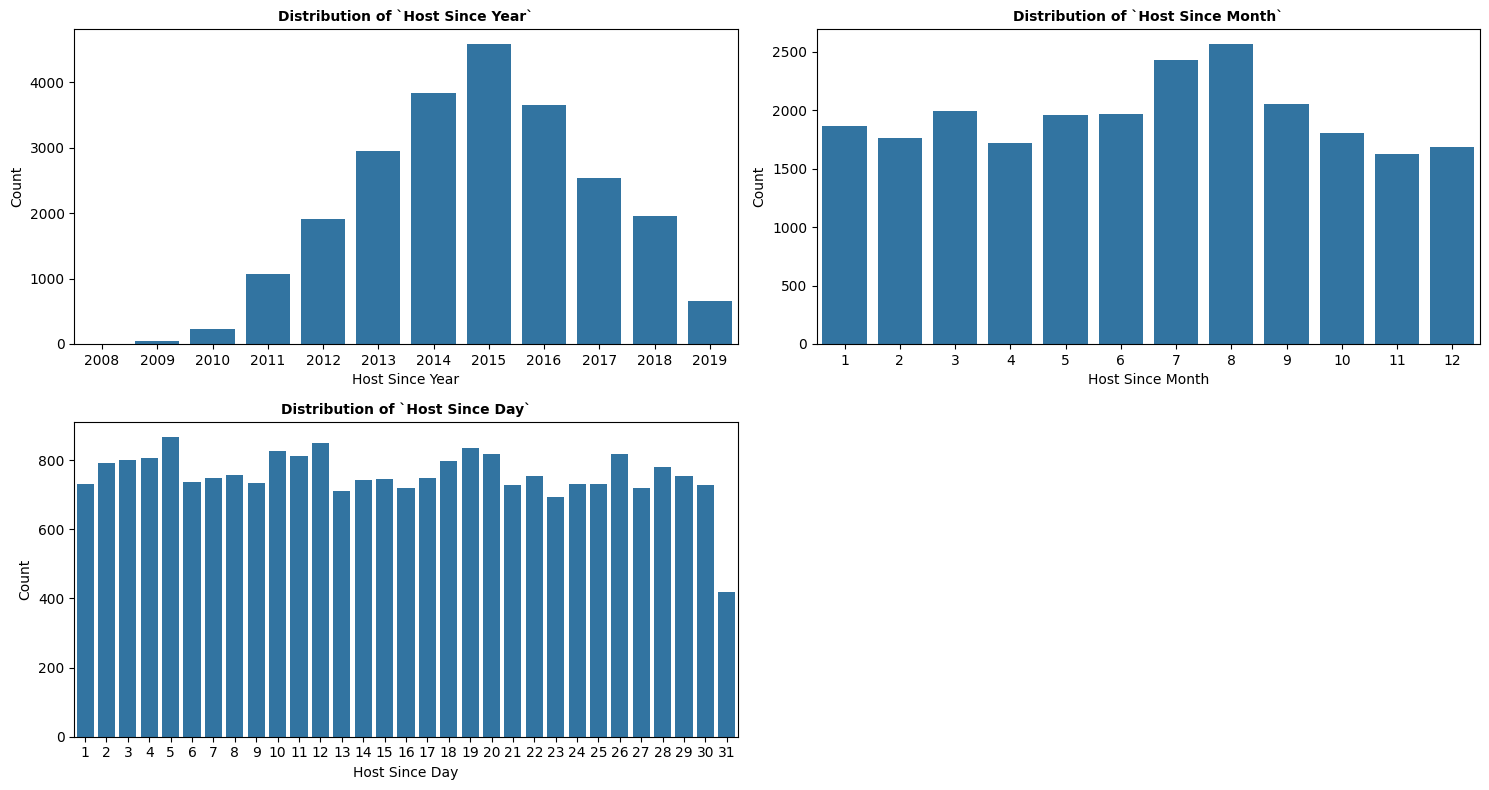

In [52]:
i = 1
plt.figure(figsize=(15, 8))
# Adjust spacing
plt.subplots_adjust(hspace=0.6)
for col in ['Host Since Year','Host Since Month','Host Since Day']:
  plt.subplot(2, 2, i)
  plt.title(f"Distribution of `{col}`", fontsize=10, fontweight="bold")
  plt.xlabel(col)
  plt.xticks(rotation=xticks_map.get(col, 0))
  plt.ylabel("Count")
  sorted_order = df[col].value_counts().index.sort_values( key=lambda x: pd.to_numeric(x, errors='coerce'))
  sns.countplot(data=df, x=col, order=sorted_order)
  i = i + 1

plt.tight_layout()
plt.show()

## Histograms for continues numbers

Checking the distribution of key numerical features

In [70]:
numerical_columns

['Price',
 'Reviews',
 'Overall Rating',
 'Bedrooms',
 'Bathrooms',
 'Beds',
 'Accomodates']

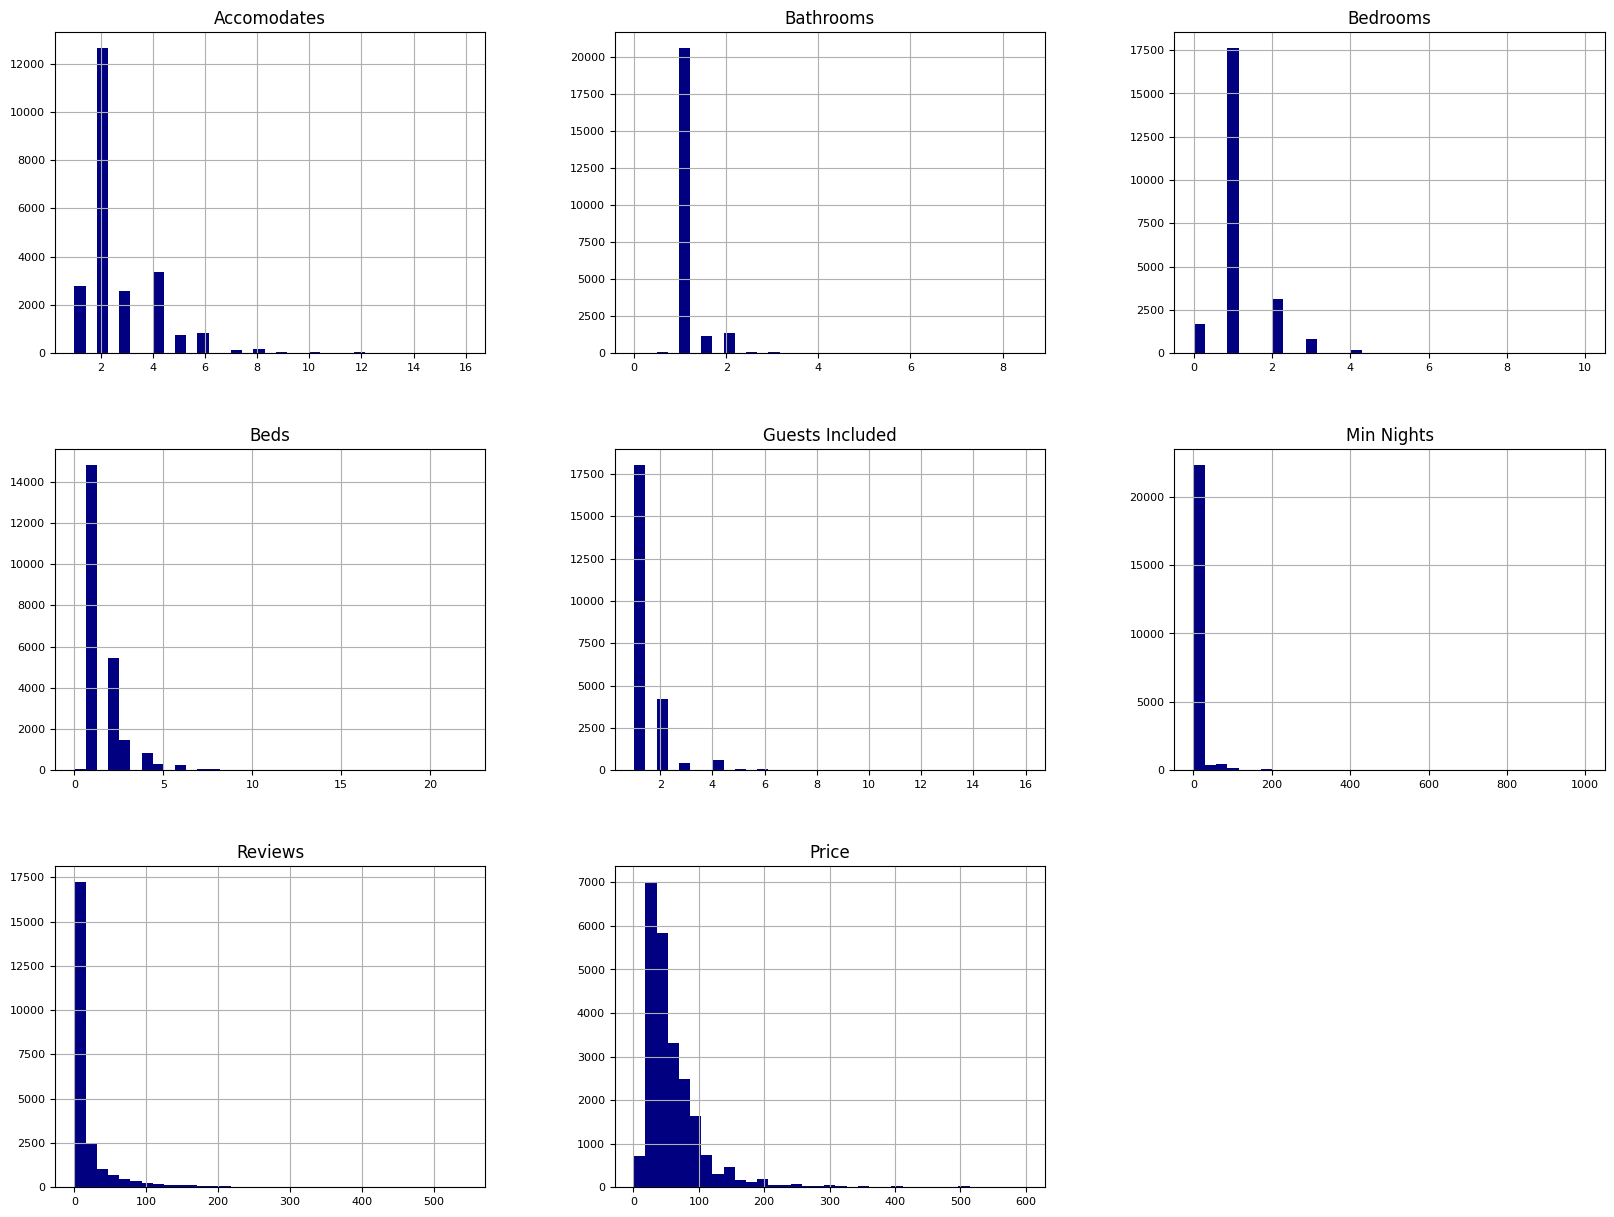

In [91]:
df[numerical_columns].hist(figsize=(20, 15), bins=35, xlabelsize=8, ylabelsize=8, color = "navy");

In [92]:
def plot_histplot_for_columns(df, numerical_columns):
  plt.figure(figsize=(12, 12))
  plt.subplots_adjust(hspace = 0.5)
  for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[col].dropna(), bins=50, kde=True)
    plt.title(f"Distribution of {col}")

  plt.tight_layout()
  plt.show()

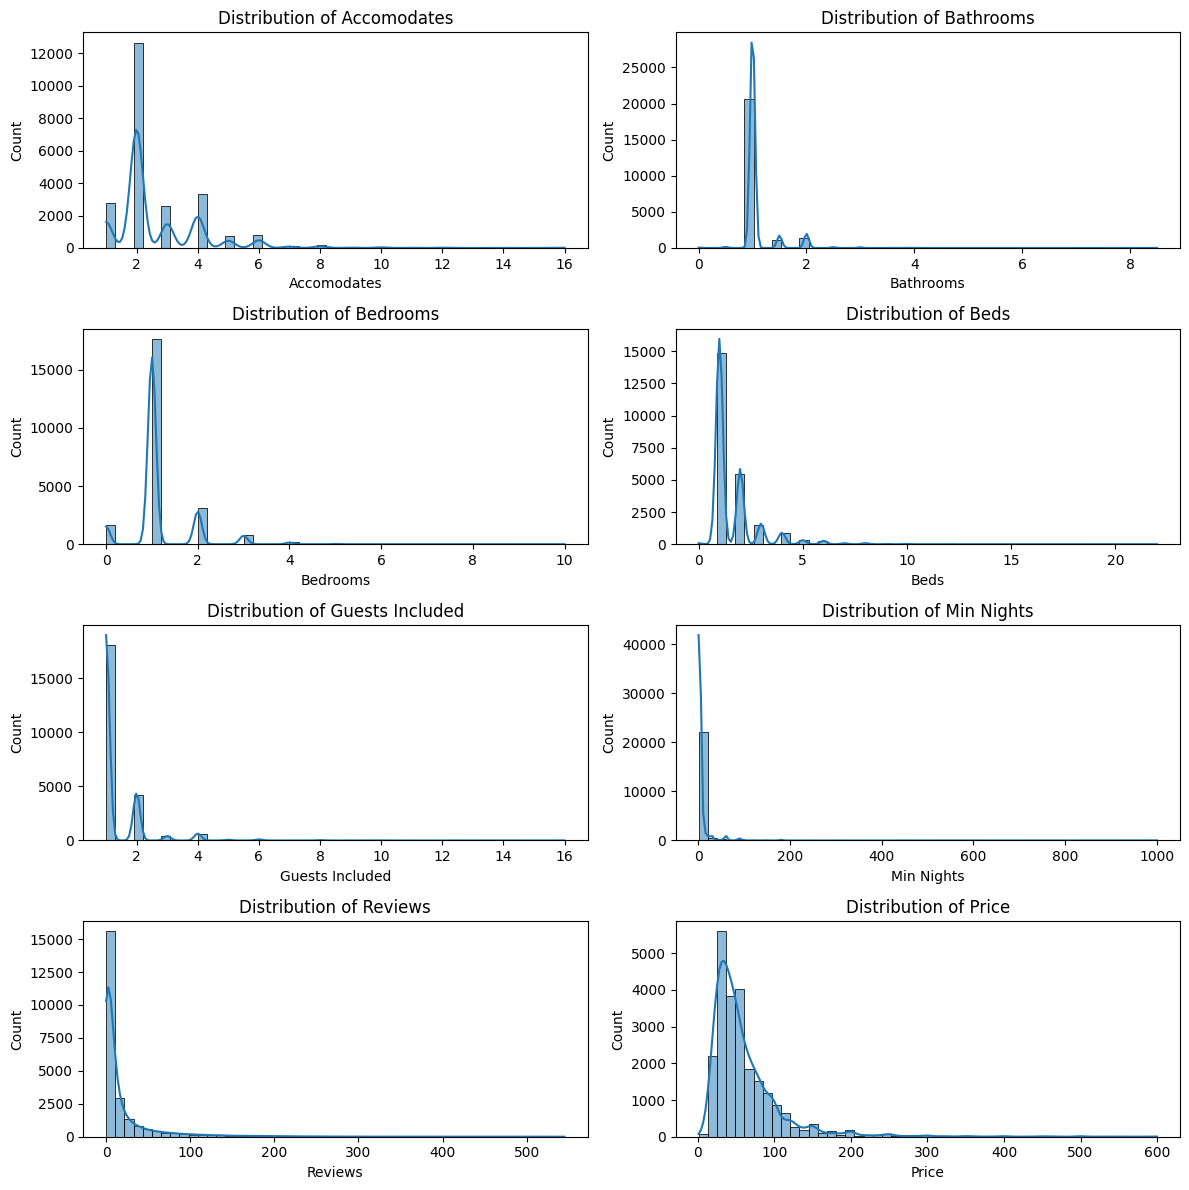

In [93]:
# Checking the distribution of key numerical features
# numerical_columns = [
#     "Price", "Reviews", "Overall Rating", "Bedrooms", "Bathrooms", "Beds", "Accomodates"
# ]

plot_histplot_for_columns(df, numerical_columns)

As expected, we can notice that some of the numerics are more categorical data like (for example, Accomadates, Bathrooms and Beds).
It worth using barplot to show relations ship with target value

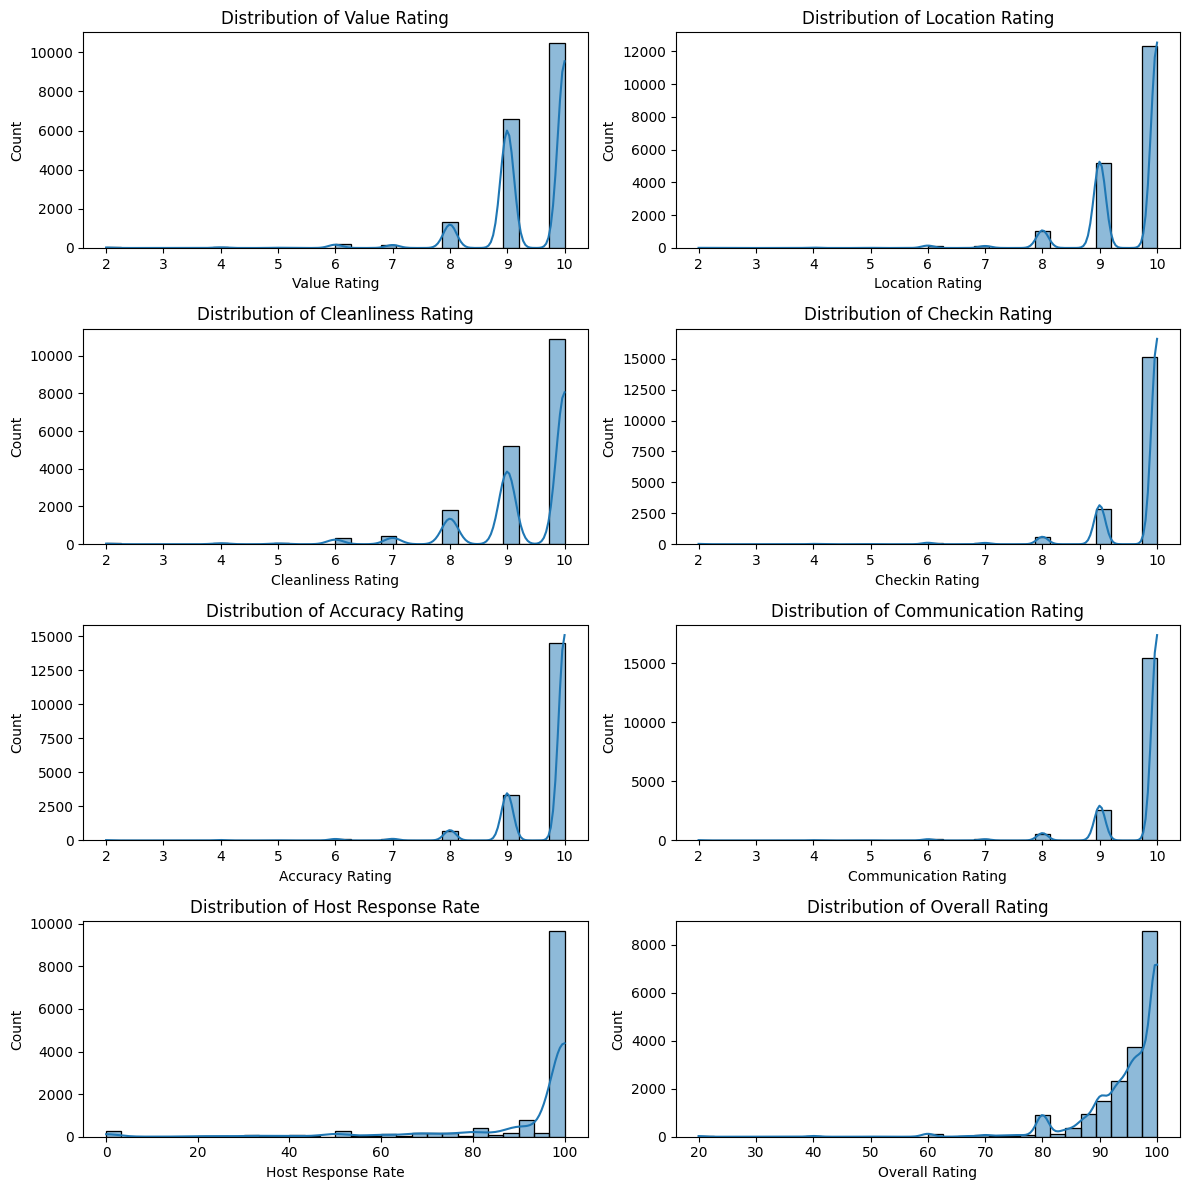

In [86]:
plot_histplot_for_columns(df, rating_columns)

<Axes: xlabel='Bedrooms', ylabel='Price'>

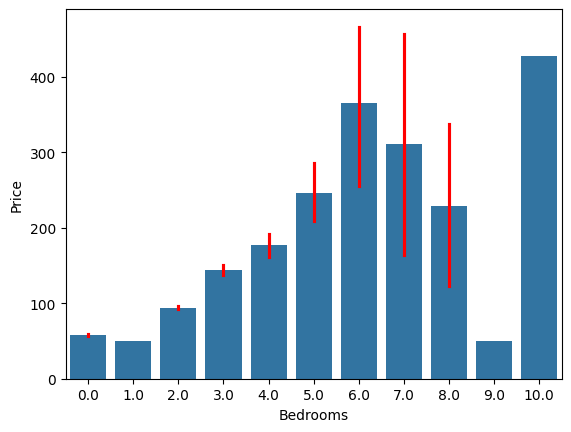

In [88]:
sns.barplot(x=df['Bedrooms'], y=df['Price'], errcolor="red")

In [ ]:
# sns.histplot(data = df[df['Bedrooms'] == 2], x="Price", bins=20, kde=True)
# sns.histplot(data = df, x="Price", bins=20, hue="Bedrooms", kde=True, multiple="dodge")

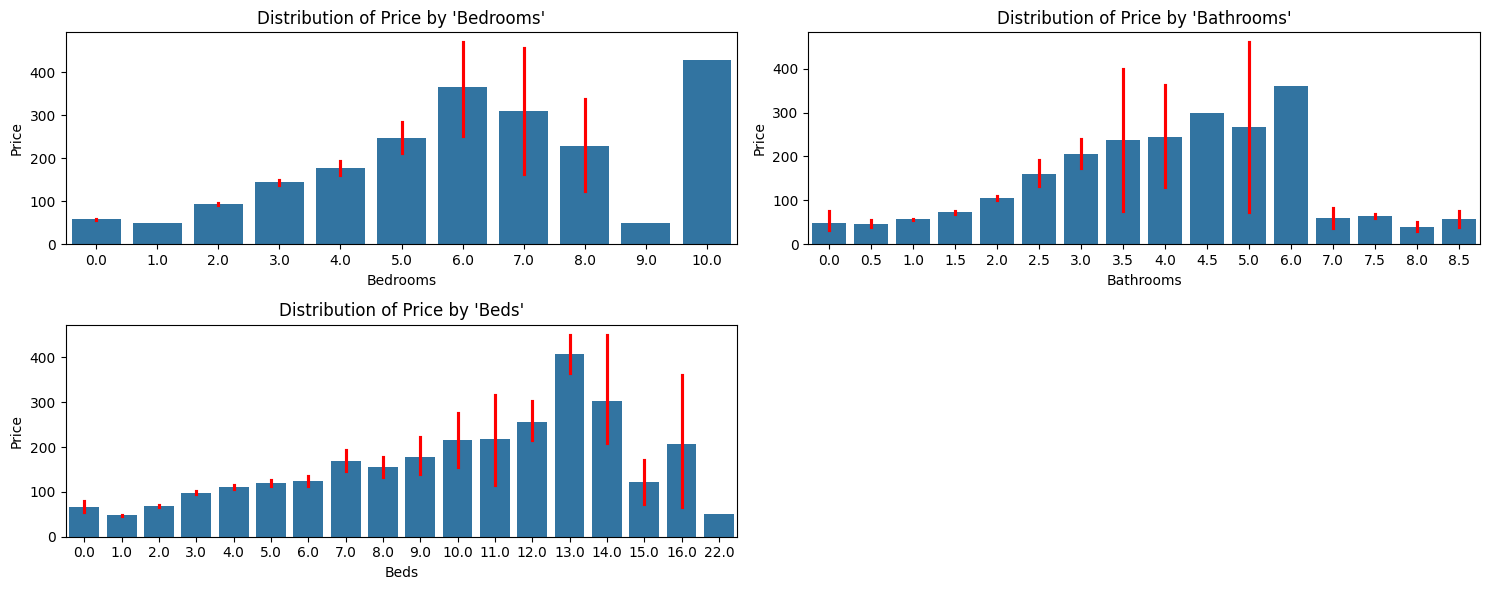

In [98]:
bar_plot_columns = ['Bedrooms', 'Bathrooms', 'Beds']
plt.figure(figsize=(15, 6))
plt.subplots_adjust(hspace = 0.5)
for i, col in enumerate(bar_plot_columns, 1):
  plt.subplot(2, 2, i)
  sns.barplot(x=df[col], y=df['Price'], errcolor="red")
  plt.title(f"Distribution of Price by '{col}'")

plt.tight_layout()
plt.show()

## Skewness